✍ В предыдущих юнитах мы разобрались с ансамблями, в которых объединение нескольких моделей одного типа помогает повысить качество предсказания при решении задачи регрессии или классификации. А что, если мы объединим модели двух или трёх типов (например, логистическую регрессию, метод опорных векторов и KNN)? Может быть, это сделает результат ещё лучше? Да, это действительно может помочь. В некоторых случаях очень полезно использовать различные виды моделей, чтобы повысить точность прогнозирования.

Тогда возникает следующий вопрос: как именно мы можем объединить несколько моделей разных типов?

Здесь нам на помощь приходит **стекинг** — третий вид ансамблирования моделей. Принцип реализации стекинга мы уже обсудили в одном из предыдущих модулей, а в этом юните мы формализуем всё изученное в чёткий алгоритм и ещё раз закрепим этот материал. Математических выкладок здесь уже практически не будет, так как стекинг является абсолютной эвристикой, под которой нет никакого теоретического фундамента — его эффективность можно наблюдать только на практике.

## **Стекинг** —  это агрегация ответов моделей машинного обучения. Подход использует понятие **базовых моделей**, каждая из которых обучается независимо от остальных, и **метамодели**, которая использует предсказания базовых моделей как признаки.

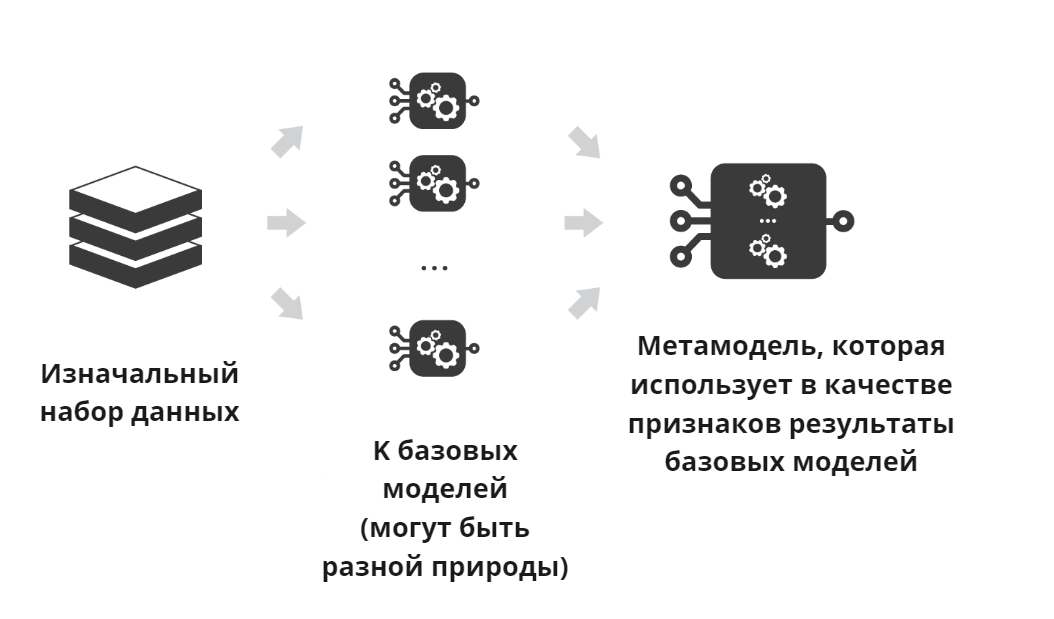

Представим, что мы обучили $K$ базовых моделей $a_1(x),...,a_k(x)$ на некоторой выборке и теперь хотим использовать их результаты для обучения метамодели $f(x)$.

Самый простой вариант — обучить метамодель на той же выборке. Тогда функция потерь будет выражаться следующим образом:

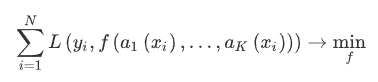

## → В таком случае метамодель $f$ будет отдавать предпочтение тем базовым алгоритмам, которые сильнее других подстроились под целевую переменную при обучении, так как по их прогнозам проще всего предсказывать правильные ответы. Если среди базовых алгоритмов будет тот, который просто запомнил все ответы на обучающей выборке, то метаалгоритму будет проще всего использовать только прогнозы данного переобученного базового алгоритма, ведь такой подход будет давать максимальный результат. Но, разумеется, высокое качество в таком случае будет только на обучающей выборке — на тестовой оно будет значительно хуже.

Поэтому важно отметить, что **базовые алгоритмы и метамодель должны обучаться на разных выборках**. 

Разобьём выборку на $L$ частей: $X_1, X_2,...,X_L$. Пусть $a_j^-l(x)$ — это базовый $j$-й алгоритм, который обучен на всех подвыборках, кроме первой.

Для обучения метамодели мы будем минимизировать следующий функционал:

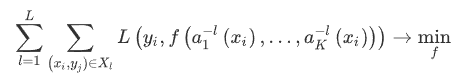

Как мы уже выяснили, чтобы избежать переобучения, необходимо обучать базовые модели и метамодель на разных выборках. Это можно делать с помощью **блендинга** или **стекинга**.

# **БЛЕНДИНГ**

## **Блендинг** является простейшей реализацией стекинга.

Объясним его суть на примере ↓

Предположим, у нас есть обучающая выборка $X$, которую мы делим пополам: первая часть используется для обучения базовых моделей, а на второй базовые модели делают предсказания — метапризнаки, на которых и обучается в дальнейшем метамодель.

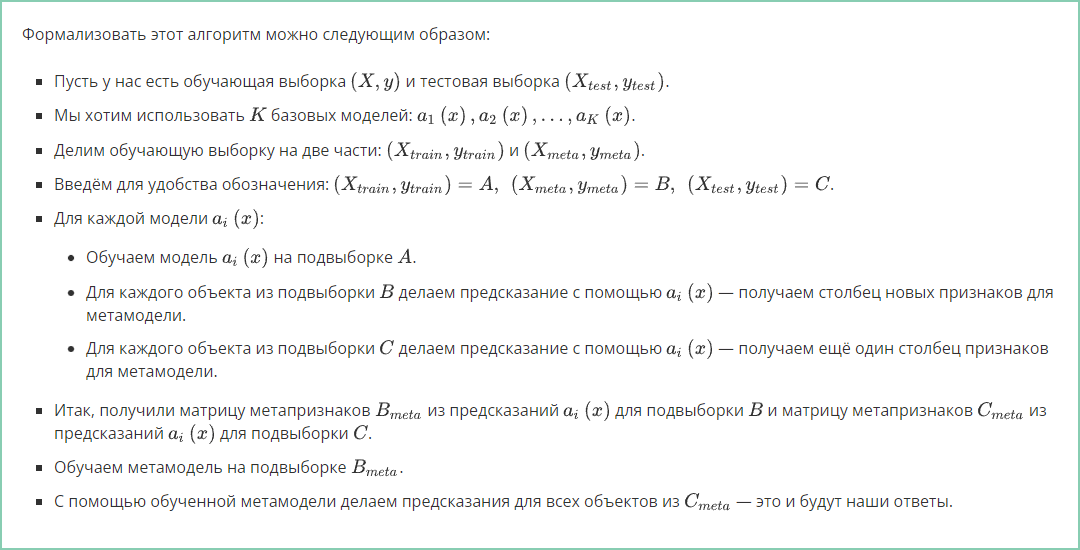

## Важно отметить, что для блендинга можно и нужно использовать базовые алгоритмы разной природы: например, вы можете объединять KNN, метод опорных векторов, решающие деревья и на результатах этих базовых алгоритмов обучать метамодель.


Метамодель тоже может быть разной природы, но часто в качестве неё берут просто линейную модель:

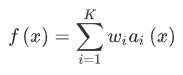

Схематично описанный выше алгоритм можно изобразить следующим образом:

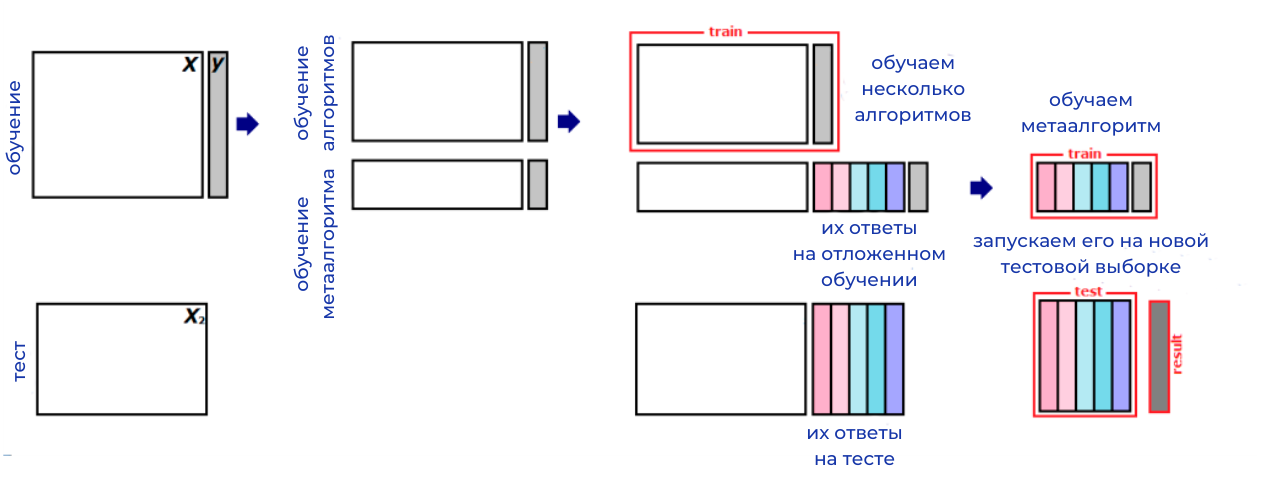

# **СТЕКИНГ**

*К сожалению, у блендинга есть проблема: ни базовые модели, ни метамодель не обучаются на полных данных.*

Эту проблему решает **стекинг**.

Чтобы в итоге все модели могли «познакомиться» с полным набором данных, можно использовать подход, аналогичный кросс-валидации: мы можем разделять выборку на $L$ частей, обучать модель на части $L-1$ и делать предсказание на оставшейся. Определённого правила для выбора количества частей нет, но, разумеется, чем больше их будет, тем выше будет качество (времени на обучение также будет потрачено больше).

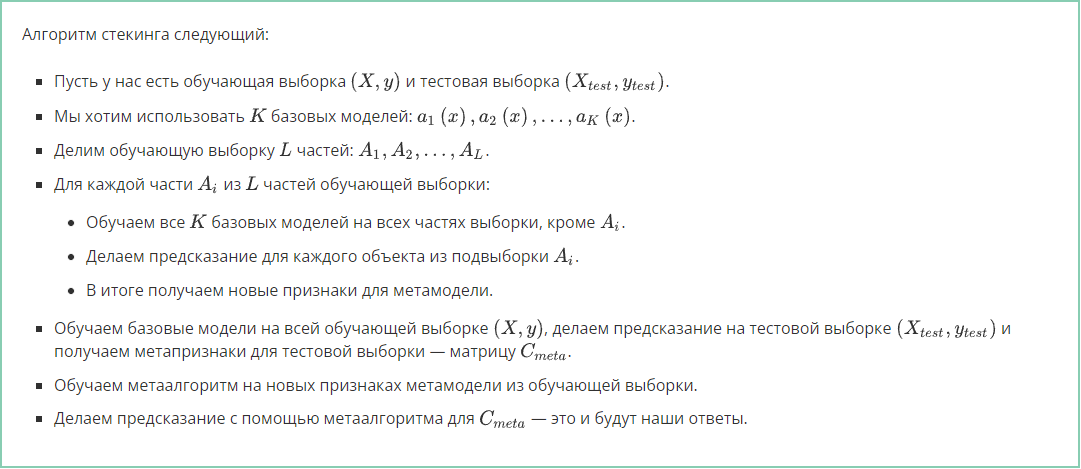

Схематично можно изобразить это так:

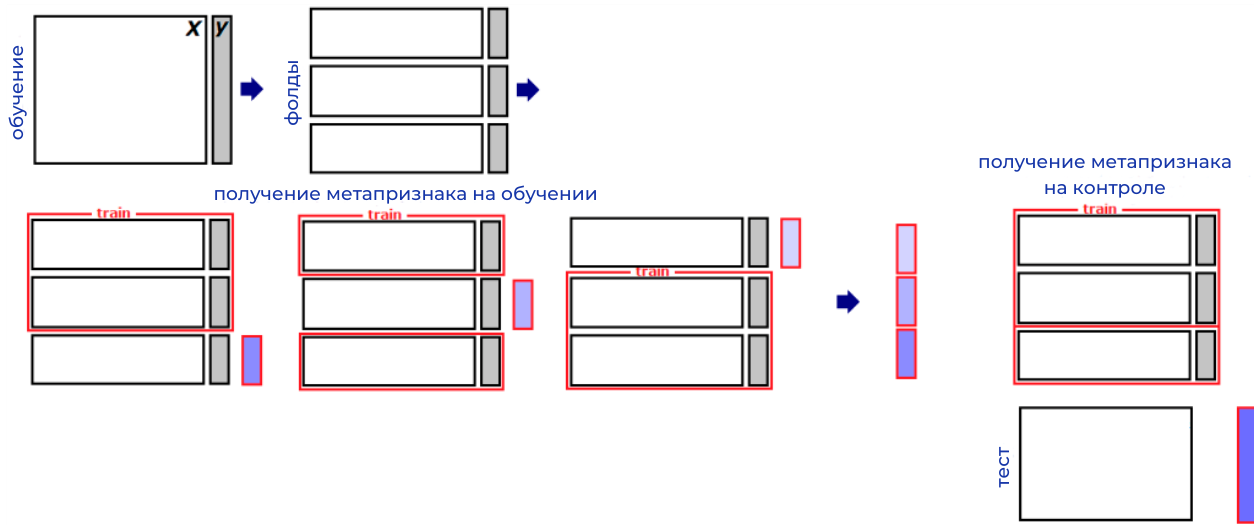

Несомненный **плюс стекинга** в том, что использование различных видов алгоритмов может помочь идентифицировать сложные зависимости. Например, ниже можно видеть иллюстрацию задачи классификации, где структура данных довольно сложная, но при использовании нескольких алгоритмов получается её выявить.

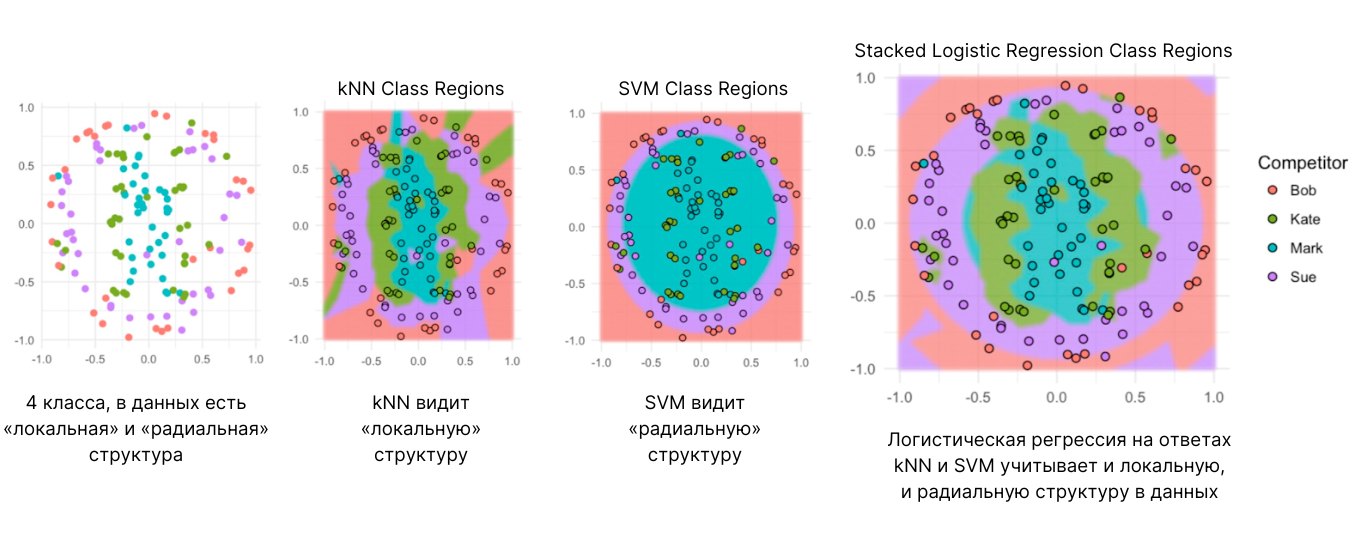

Также метод стекинга можно реализовать с более чем двумя уровнями — это называется многоуровневым стекингом. В таком случае мы определяем базовые модели, затем обучаем ряд метамоделей на результатах базовых моделей и в итоге обучаем конечную метамодель. Рассматривать и реализовывать такой подход мы не будем, так как улучшение качества будет незначительным, а вычислительные затраты — невероятно высокими.

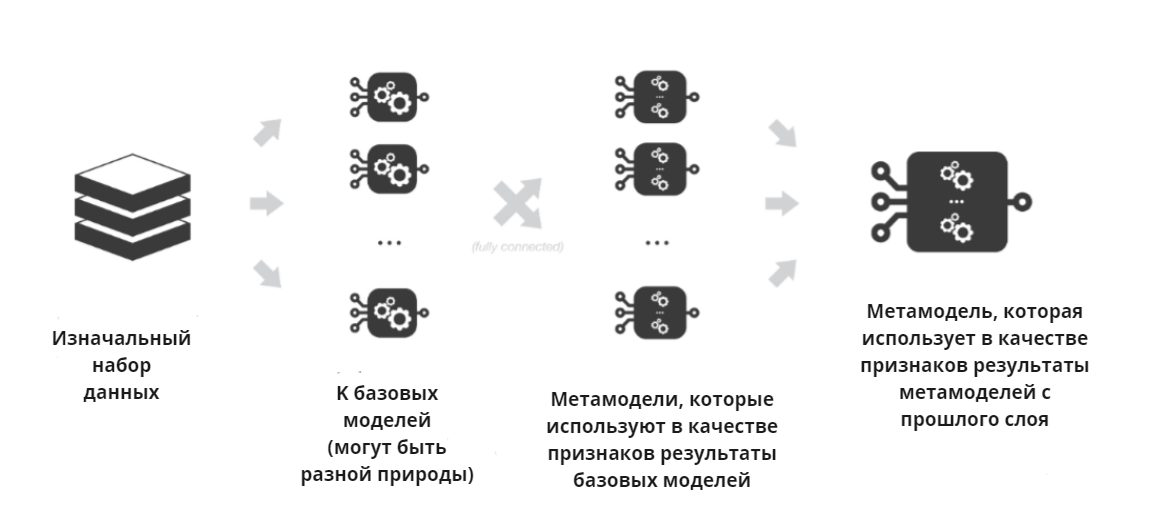

Возможно, вы заметили, что принцип многоуровневого стекинга очень похож на принцип работы искусственных нейронных сетей, о которых мы говорили ранее в модуле про оптимизацию, и это действительно так.

Давайте вспомним плюсы и минусы стекинга, которые мы уже рассматривали в предыдущих модулях:

## Плюсы:

+ хорошо параллелится (модели обучаются параллельно);
+ хорошо подходит для использования различных по природе базовых моделей.

## Минусы:

+ качество сильно зависит от качества базовых моделей;
+ плохо интерпретируемые результаты.

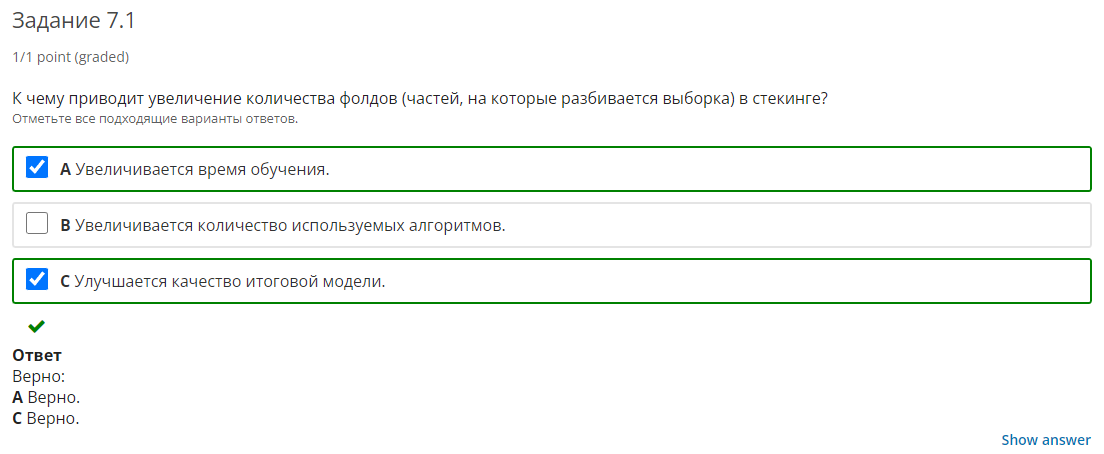

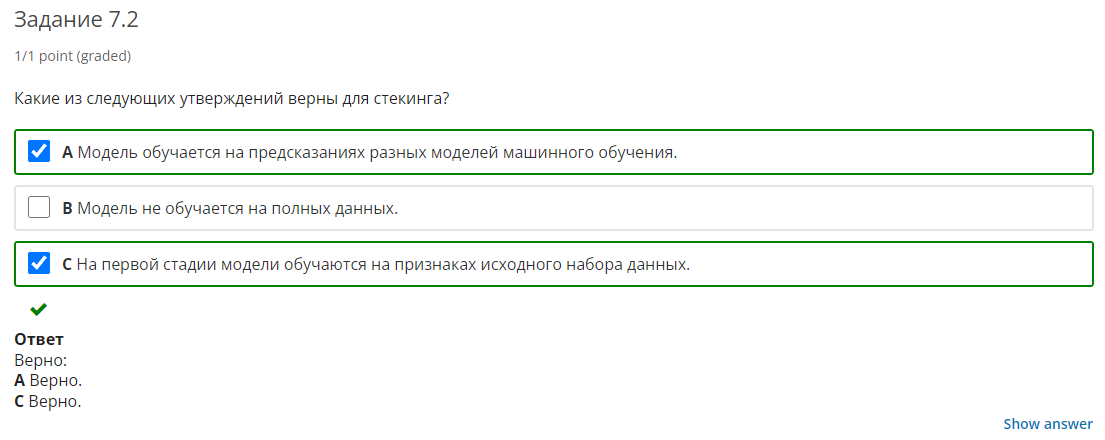

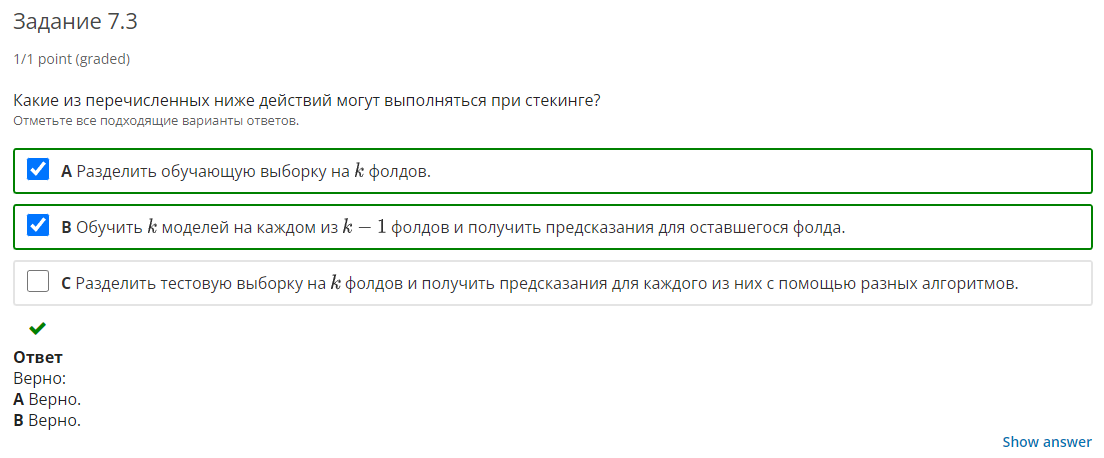

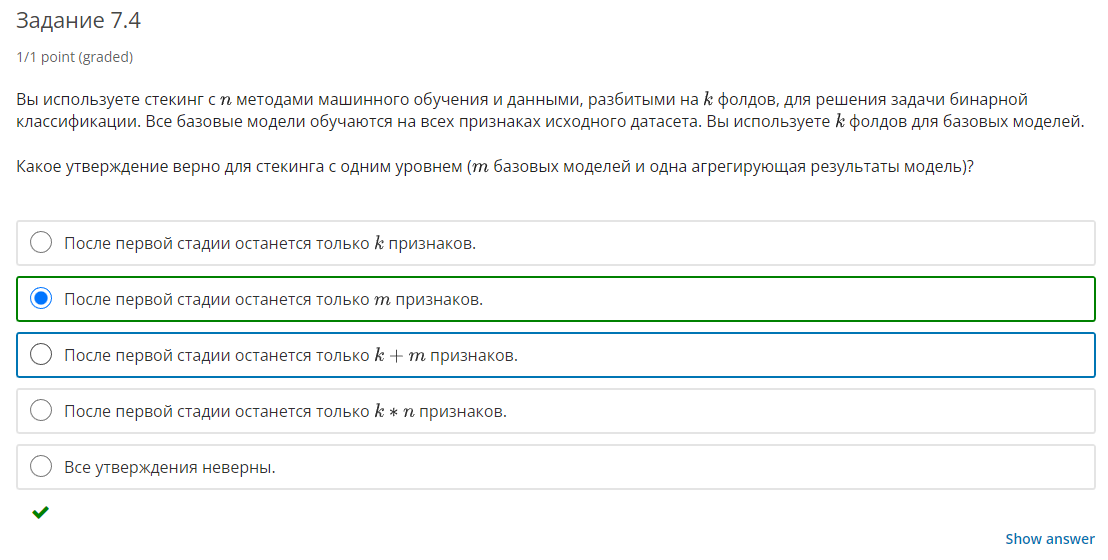

Теперь, когда теоретические основы изучены, наступает время практики: потренируемся в решении задач с использованием стекинга

Мы будем работать с данными, которые содержат информацию о звуках, издаваемых лягушками, и характеристики этих звуков.

Необходимо классифицировать семейства лягушек в зависимости от особенностей их кваканья и прочих звуковых эффектов.

Будем решать задачу бинарной классификации по выявлению лягушек, которые относятся к семейству 'Dendrobatidae' (признак 'Family'). Семейство 'Dendrobatidae' будет классом 1, все остальные семейства — классом 0.

В качестве признаков, которые мы будем использовать для предсказания, необходимо взять все, кроме:

+ 'Family' — семейство лягушек;
+ 'Genus' — род лягушек;
+ 'Species' — вид лягушек;
+ 'RecordID' — ID записи.

Все остальные признаки относятся к акустическим особенностям кваканья — они-то нам и понадобятся, чтобы определить, к какому семейству относится лягушка.

Разделите выборку на обучающую и тестовую в соотношении 80/20, параметр random_state = 31.

## Задание 7.5

Для начала обучите на наших данных случайный лес с десятью решающими деревьями. Воспользуйтесь параметрами по умолчанию. В качестве значения random_state возьмите число 42.

Оцените значение $F_1$-меры и введите его в качестве ответа, предварительно округлив до двух знаков после точки-разделителя.

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics
from sklearn import tree
from sklearn import ensemble
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import f1_score

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('data/Frogs_MFCCs.csv')
df.head()

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1


In [7]:
df["Family"] = np.where(df["Family"] == "Dendrobatidae", 1, 0)

In [8]:
X = df.drop(columns=["Family","Genus","Species","RecordID"])
y = df["Family"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=31)
y_test.shape

(1439,)

In [12]:
model_rfc = RandomForestClassifier(10, random_state=42)
model_rfc.fit(X_train, y_train)
pred = model_rfc.predict(X_test)
f1_score(y_test, pred)

0.9726775956284154

## Задание 7.6

Теперь попробуем улучшить качество нашего предсказания за счёт использования стекинга.

В качестве базовых моделей выберите следующие:

+ случайный лес с десятью деревьями, random_state = 31;
+ KNN, количество соседей = 11;
+ наивный байесовский классификатор с параметрами по умолчанию, в качестве метода возьмите GaussianNB().

В качестве метамодели выберите логистическую регрессию.

Обучите модели и сделайте предсказание целевой метки для тестового набора данных.

Рассчитайте $F_1$-меру для тестового набора данных и введите её в качестве ответа, предварительно округлив до двух знаков после точки-разделителя.

In [16]:
estimators = [('rf', RandomForestClassifier(n_estimators=10, random_state=31)),
              ('knn', KNeighborsClassifier(n_neighbors= 11)),
              ('nb', GaussianNB() )               
]
metamodel = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)
metamodel.fit(X_train, y_train)
pred = metamodel.predict(X_test)
f1_score(y_test, pred)

0.989247311827957

Отлично, мы увидели, как сильно улучшает качество применение стекинга. Несмотря на недостатки этого метода (долгое обучение, необходимость подбора параметров, редкое использование на практике — зачастую лишь для того, чтобы добыть дополнительные баллы на Kaggle), в определённых ситуациях он может быть очень полезен. Если у вас достаточно вычислительных ресурсов, вы готовы потратить время на подбор моделей и параметров, а точность модели крайне важна, стекинг сослужит вам хорошую службу.

Теперь, когда в вашем арсенале есть все ансамблевые методы, нам осталось лишь подвести итоги этого модуля →